In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d hiteshk07/fashion-dataset-yolov8

Dataset URL: https://www.kaggle.com/datasets/hiteshk07/fashion-dataset-yolov8
License(s): unknown
 86% 89.0M/104M [00:00<00:00, 127MB/s]
100% 104M/104M [00:00<00:00, 117MB/s] 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fashion-dataset-yolov8.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 kB 7.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random
import os
import cv2
import shutil
import tqdm
import glob
import torch

In [ ]:
# Check GPU is working or not
print(f"Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Using torch 2.3.0+cu121 (Tesla T4)


In [ ]:
path = '/content/Fashion-Dataset-Yolov8'
images_path = path + '/JPEGImages/'
annotations_path  = path + '/Annotations_txt/'

In [ ]:
from ultralytics import YOLO
# load pre-trained model
detection_model = YOLO("yolov8l.pt")


Found https://i.stack.imgur.com/GRdCC.jpg locally at GRdCC.jpg
image 1/1 /content/GRdCC.jpg: 448x640 1 person, 1 bicycle, 4 cars, 3 trucks, 55.9ms
Speed: 2.9ms preprocess, 55.9ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2


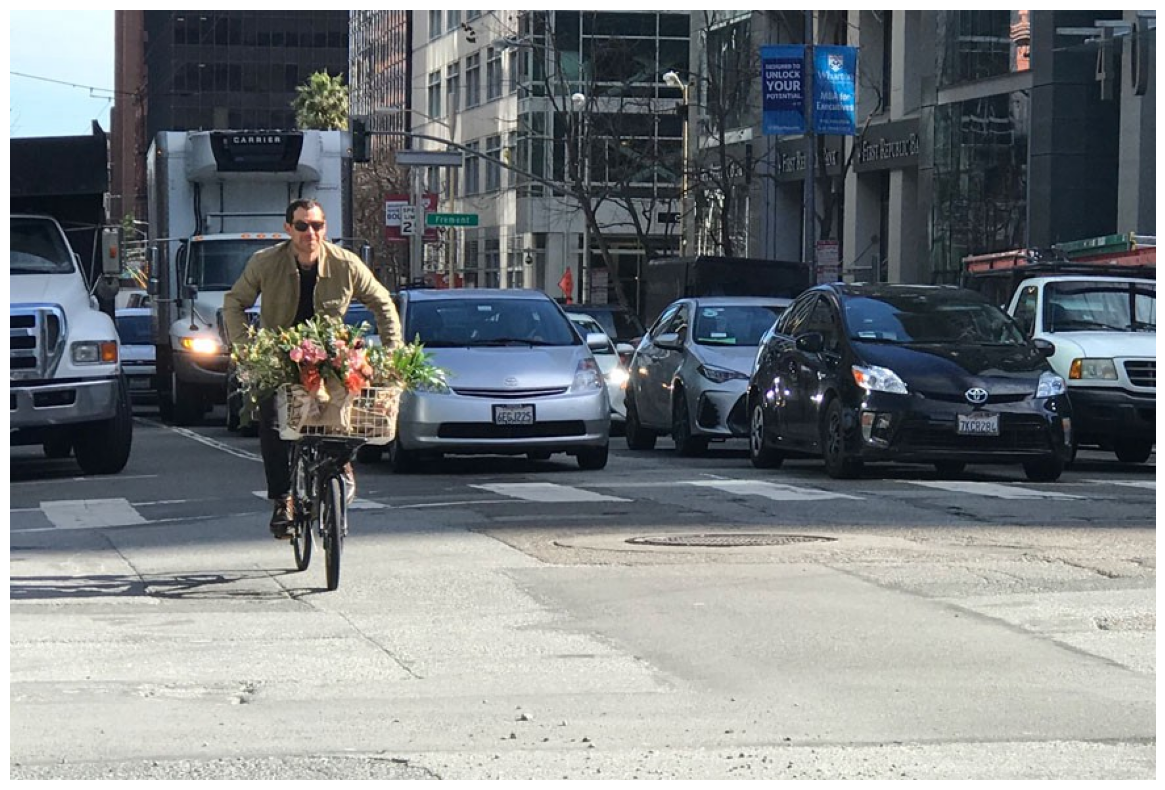

In [ ]:
# choose random image
img = random.choice(os.listdir(images_path))
pred=detection_model.predict(source='https://i.stack.imgur.com/GRdCC.jpg', conf=0.5, save=True, line_width=2, show_labels=True)
im = plt.imread('/content/GRdCC.jpg')
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(im)

In [ ]:
def convert(size, x, y, w, h): #size: (w,h)
    box = np.zeros(4) #np.array([0.,0.,0.,0.])
    dw = 1. / size[0] #size[0]: w
    dh = 1. / size[1] #size[1]: h
    x = x / dw                                          #dw: reciprocal of w   #dh: reciprocal of h
    w = w / dw
    y = y / dh
    h = h / dh
    box[0] = x - (w / 2.0)  # Calculate xmin
    box[1] = x + (w / 2.0)  # Calculate xmax
    box[2] = y - (h / 2.0)  # Calculate ymin
    box[3] = y + (h / 2.0)  # Calculate ymax
    return box

# Function to plot bounding box annotations on an image
def plot_annotations(img, filename):
    # Make a writable copy of the image
    img_copy = img.copy()
    # Open annotations file
    with open(annotations_path + filename, 'r') as f:
        # Read each line (assuming each line contains one annotation)
        for line in f:
            # Split line into values
            value = line.split()
            cls = int(value[0])  # Class label (assuming it's the first value)
            x = float(value[1])  # Center x-coordinate of the bounding box
            y = float(value[2])  # Center y-coordinate of the bounding box
            w = float(value[3])  # Width of the bounding box
            h = float(value[4])  # Height of the bounding box

            img_h, img_w = img_copy.shape[:2]  # Get height and width of the image
            bb = convert((img_w, img_h), x, y, w, h)  # Convert bounding box to pixel coordinates

            # Draw rectangle on the image using OpenCV
            cv2.rectangle(img_copy, (int(round(bb[0])), int(round(bb[2]))),
                          (int(round(bb[1])), int(round(bb[3]))),
                          (255, 0, 0), 2)  # Draw rectangle with blue color (BGR format), thickness 2

    # Display the image with annotations using Matplotlib
    plt.axis('off')  # Turn off axis
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.figure(figsize=(20,12))
ls = os.listdir(images_path)
c = 1
for i in random.sample(ls, 10):
    img = plt.imread(images_path+i)
    i = i.rstrip('.jpg') + '.txt'
    plt.subplot(2,5, c)
    plot_annotations(img, i)
    c+=1

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
train = []
with open(path+'/ImageSets/Main/trainval.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        train.append(line)

test = []
with open(path+'/ImageSets/Main/test.txt', 'r') as f:
    for line in f.readlines():
        if line[-1]=='\n':
            line = line[:-1]
        test.append(line)

In [ ]:
len(train), len(test)

(2145, 537)

In [ ]:
os.mkdir('train')
os.mkdir('train/images')
os.mkdir('train/labels')

os.mkdir('test')
os.mkdir('test/images')
os.mkdir('test/labels')

In [ ]:
train_path = '/content/train/'
test_path = '/content/test/'

print('Copying Train Data..!!')
for i in tqdm.tqdm(train):
    a = shutil.copyfile(images_path+i+'.jpg', train_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', train_path+'labels/'+i+'.txt')

print('Copying Test Data..!!')
for i in tqdm.tqdm(test):
    a = shutil.copyfile(images_path+i+'.jpg', test_path+'images/'+i+'.jpg')
    a = shutil.copyfile(annotations_path+i+'.txt', test_path+'labels/'+i+'.txt')

Copying Train Data..!!


100%|██████████| 2145/2145 [00:03<00:00, 653.77it/s] 


Copying Test Data..!!


100%|██████████| 537/537 [00:00<00:00, 1504.49it/s]


In [ ]:
text = """
train: /content/train
val: /content/test

# number of classes
nc: 10

# class names
names: ['sunglass','hat','jacket','shirt','pants','shorts','skirt','dress','bag','shoe']
"""
with open("data.yaml", 'w') as file:
    file.write(text)

In [ ]:
model = YOLO("yolov8l.pt")
model.train(data='data.yaml', epochs=50)

Ultralytics YOLOv8.2.56 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 755k/755k [00:00<00:00, 19.6MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 131MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/train/labels... 2145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2145/2145 [00:01<00:00, 1984.47it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/test/labels... 537 images, 0 backgrounds, 0 corrupt: 100%|██████████| 537/537 [00:00<00:00, 936.04it/s]

val: New cache created: /content/test/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.6G      1.304      1.735      1.471         10        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:09<00:00,  1.73it/s]

                   all        537       2035        0.6      0.578      0.573      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      11.6G      1.325      1.368      1.511          4        640: 100%|██████████| 135/135 [01:45<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.19it/s]

                   all        537       2035      0.576      0.602      0.596      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.6G      1.332      1.351      1.522          9        640: 100%|██████████| 135/135 [01:46<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  1.98it/s]

                   all        537       2035      0.654      0.568      0.603      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      11.4G      1.337      1.291      1.519          9        640: 100%|██████████| 135/135 [01:46<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.05it/s]

                   all        537       2035      0.588      0.672      0.662      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.5G      1.303      1.219      1.502          7        640: 100%|██████████| 135/135 [01:46<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:09<00:00,  1.88it/s]

                   all        537       2035      0.644       0.68      0.698      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      11.5G      1.273      1.169      1.495          3        640: 100%|██████████| 135/135 [01:47<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.19it/s]

                   all        537       2035      0.668      0.719      0.718      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      11.5G      1.245      1.131      1.479          2        640: 100%|██████████| 135/135 [01:47<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:09<00:00,  1.78it/s]

                   all        537       2035      0.594       0.74      0.714      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      11.4G      1.218      1.078      1.443          3        640: 100%|██████████| 135/135 [01:47<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.19it/s]

                   all        537       2035      0.637       0.74      0.727       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      11.5G      1.207      1.046       1.45          4        640: 100%|██████████| 135/135 [01:46<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.683      0.727      0.731      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.5G       1.18      1.014      1.432          9        640: 100%|██████████| 135/135 [01:47<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:09<00:00,  1.88it/s]

                   all        537       2035      0.723       0.74      0.761        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      11.5G       1.17     0.9955      1.424          5        640: 100%|██████████| 135/135 [01:46<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.08it/s]

                   all        537       2035      0.696       0.75      0.754      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      11.4G      1.149     0.9552      1.401          9        640: 100%|██████████| 135/135 [01:46<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.05it/s]

                   all        537       2035      0.703      0.751       0.77      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      11.5G      1.147     0.9371      1.399          8        640: 100%|██████████| 135/135 [01:45<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.00it/s]

                   all        537       2035      0.758      0.719      0.759      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.5G      1.128     0.9181      1.385          6        640: 100%|██████████| 135/135 [01:46<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.00it/s]

                   all        537       2035      0.732      0.712      0.753      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.5G      1.119     0.9031      1.389         10        640: 100%|██████████| 135/135 [01:46<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  1.89it/s]

                   all        537       2035      0.728      0.755      0.772      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      11.4G      1.095     0.8753      1.371         11        640: 100%|██████████| 135/135 [01:45<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.03it/s]

                   all        537       2035      0.728      0.741      0.768      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      11.5G       1.09     0.8704      1.363          3        640: 100%|██████████| 135/135 [01:46<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.03it/s]

                   all        537       2035      0.765      0.748      0.792      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      11.5G      1.061     0.8239      1.341         10        640: 100%|██████████| 135/135 [01:46<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  1.92it/s]

                   all        537       2035      0.731      0.754      0.778      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.5G      1.051     0.8228      1.338         11        640: 100%|██████████| 135/135 [01:46<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.09it/s]

                   all        537       2035      0.734      0.766      0.782      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      11.4G      1.064     0.8136      1.337          9        640: 100%|██████████| 135/135 [01:47<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.06it/s]

                   all        537       2035      0.761      0.755      0.781      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      11.5G      1.039     0.7927      1.314         11        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.12it/s]

                   all        537       2035      0.707      0.769      0.775      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.5G      1.033     0.7795      1.312         14        640: 100%|██████████| 135/135 [01:50<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.07it/s]

                   all        537       2035      0.753      0.748      0.781       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      11.5G      1.029     0.7781       1.32          7        640: 100%|██████████| 135/135 [01:50<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.16it/s]

                   all        537       2035       0.78      0.768      0.796      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.4G      1.011     0.7522      1.302         14        640: 100%|██████████| 135/135 [01:50<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.763      0.769      0.801      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.5G      1.004     0.7342      1.298          5        640: 100%|██████████| 135/135 [01:50<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:09<00:00,  1.74it/s]

                   all        537       2035      0.762      0.763      0.793      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      11.5G     0.9879     0.7183      1.289          7        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.14it/s]

                   all        537       2035      0.739      0.756      0.768      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      11.5G     0.9728     0.7049      1.276         17        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.04it/s]

                   all        537       2035      0.785      0.757      0.792      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      11.4G     0.9766     0.6906      1.288          4        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.13it/s]

                   all        537       2035      0.773      0.764      0.785      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      11.5G     0.9613     0.6862      1.268          9        640: 100%|██████████| 135/135 [01:50<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.15it/s]

                   all        537       2035      0.751      0.777      0.788      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.5G      0.949     0.6631      1.264         11        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  1.95it/s]

                   all        537       2035      0.778      0.762      0.783      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      11.6G     0.9386     0.6555      1.259          9        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.10it/s]

                   all        537       2035      0.788      0.752      0.795      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.4G     0.9196     0.6392      1.242          4        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.06it/s]

                   all        537       2035      0.773      0.777      0.793      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      11.5G     0.9146      0.631      1.242         11        640: 100%|██████████| 135/135 [01:50<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  1.93it/s]

                   all        537       2035      0.757      0.759      0.783      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.5G     0.9021     0.6126      1.225          3        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.08it/s]

                   all        537       2035      0.748      0.766      0.778      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.5G     0.8923     0.6054      1.232          5        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.15it/s]

                   all        537       2035      0.776      0.767        0.8      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      11.4G     0.8807     0.5992      1.221          5        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.15it/s]

                   all        537       2035      0.784      0.759      0.792      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.5G      0.866     0.5785      1.213         11        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:09<00:00,  1.72it/s]

                   all        537       2035      0.783      0.747      0.789      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      11.5G     0.8578     0.5702      1.206         10        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.11it/s]

                   all        537       2035      0.807      0.752      0.798      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.5G     0.8486     0.5586      1.195          8        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  1.94it/s]

                   all        537       2035      0.772      0.757      0.793      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      11.4G     0.8353     0.5503      1.184         15        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.05it/s]

                   all        537       2035      0.791      0.745      0.788      0.541


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      11.5G     0.7735     0.4603      1.183          2        640: 100%|██████████| 135/135 [01:50<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  1.97it/s]

                   all        537       2035      0.803       0.74       0.78      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      11.5G     0.7512     0.4329      1.163          2        640: 100%|██████████| 135/135 [01:48<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  1.97it/s]

                   all        537       2035       0.79      0.744      0.786      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      11.5G     0.7462       0.43      1.157          3        640: 100%|██████████| 135/135 [01:49<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  1.95it/s]

                   all        537       2035      0.765      0.786      0.793      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      11.3G     0.7278      0.412      1.151          3        640: 100%|██████████| 135/135 [01:49<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:09<00:00,  1.88it/s]

                   all        537       2035      0.787      0.753       0.78      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      11.5G     0.7255     0.4041      1.147          3        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  2.09it/s]

                   all        537       2035      0.793      0.755      0.788      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      11.5G     0.7088     0.3957      1.126          3        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.14it/s]

                   all        537       2035      0.782      0.782      0.788      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      11.5G     0.6981     0.3889      1.114          4        640: 100%|██████████| 135/135 [01:49<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.16it/s]

                   all        537       2035      0.773      0.772      0.787      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      11.3G      0.683     0.3775       1.11          2        640: 100%|██████████| 135/135 [01:49<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:09<00:00,  1.83it/s]

                   all        537       2035      0.771      0.781      0.792      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      11.5G     0.6822     0.3736      1.108          4        640: 100%|██████████| 135/135 [01:49<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  1.94it/s]

                   all        537       2035      0.795      0.743      0.785       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      11.5G     0.6699     0.3662      1.103          4        640: 100%|██████████| 135/135 [01:49<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:08<00:00,  1.98it/s]

                   all        537       2035      0.744      0.791      0.786       0.54



50 epochs completed in 1.711 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 87.6MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 87.6MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.56 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,614,318 parameters, 0 gradients, 164.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:13<00:00,  1.27it/s]


                   all        537       2035      0.776      0.768        0.8      0.548
              sunglass         82         82      0.507      0.268      0.397      0.139
                   hat         77         77      0.723      0.818      0.829      0.472
                jacket        179        181       0.78      0.807      0.853      0.677
                 shirt        361        366      0.834      0.835      0.865       0.63
                 pants        114        114       0.94      0.921      0.973      0.789
                shorts        107        107      0.814      0.859      0.817      0.562
                 skirt        186        186      0.856      0.806      0.848      0.666
                 dress        128        128      0.707      0.875      0.829      0.657
                   bag        274        274      0.768      0.697      0.765      0.421
                  shoe        520        520      0.828      0.792      0.828      0.469
Speed: 0.3ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f17022b68f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [ ]:
%matplotlib inline
model_path = '/content/runs/detect/train3/'
def plot(ls, size):
    c=1
    plt.figure(figsize=(15,10))
    for im in ls:
        plt.subplot(size[0],size[1],c)
        im = plt.imread(model_path+im)
        plt.imshow(im)
        c+=1
    plt.show()

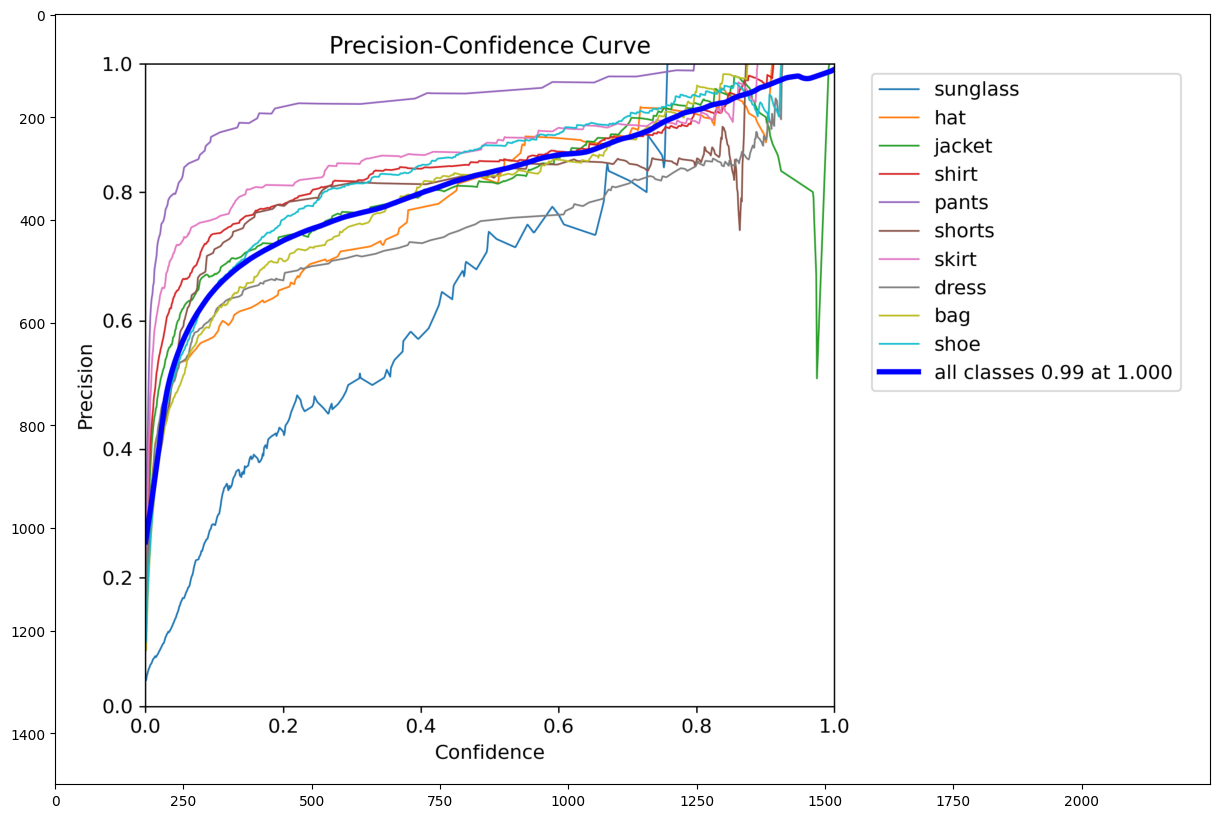

In [ ]:
plot(['P_curve.png'],(1,1))

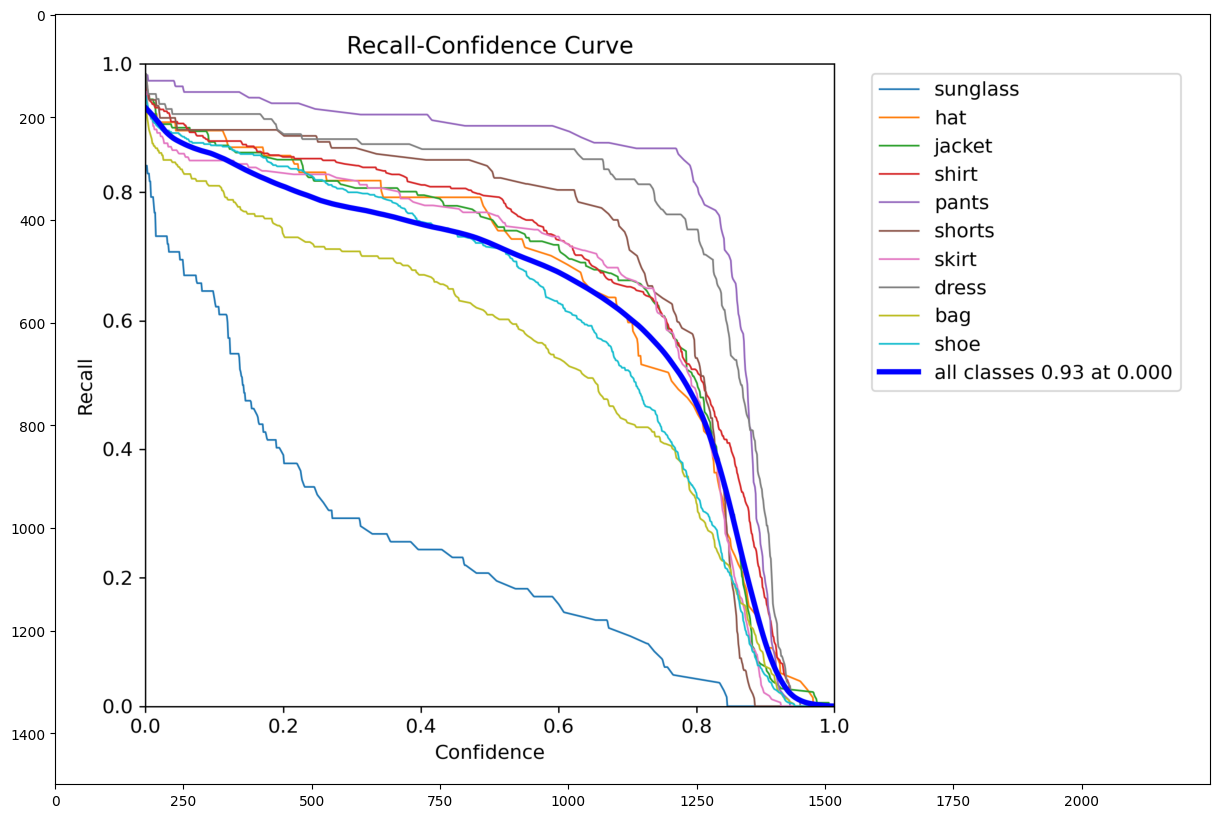

In [ ]:
plot(['R_curve.png'],(1,1))

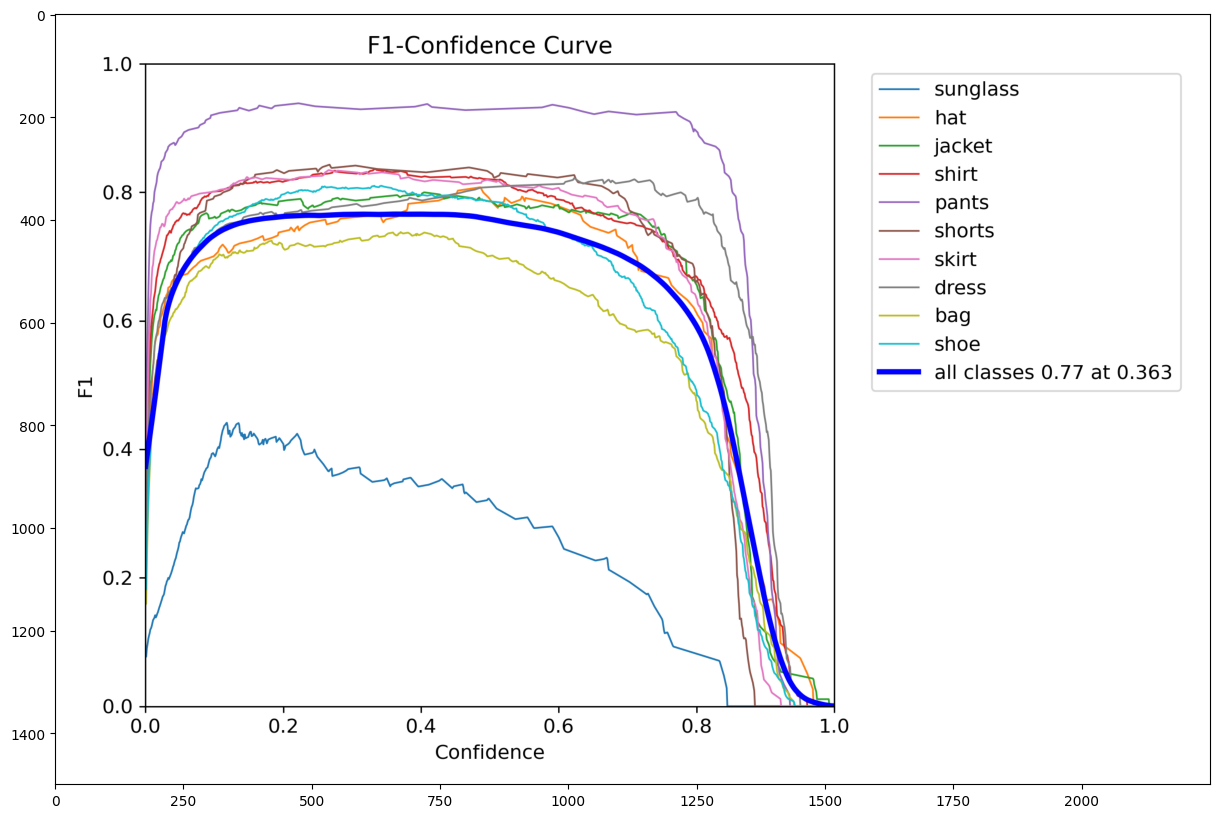

In [ ]:
plot(['F1_curve.png'],(1,1))

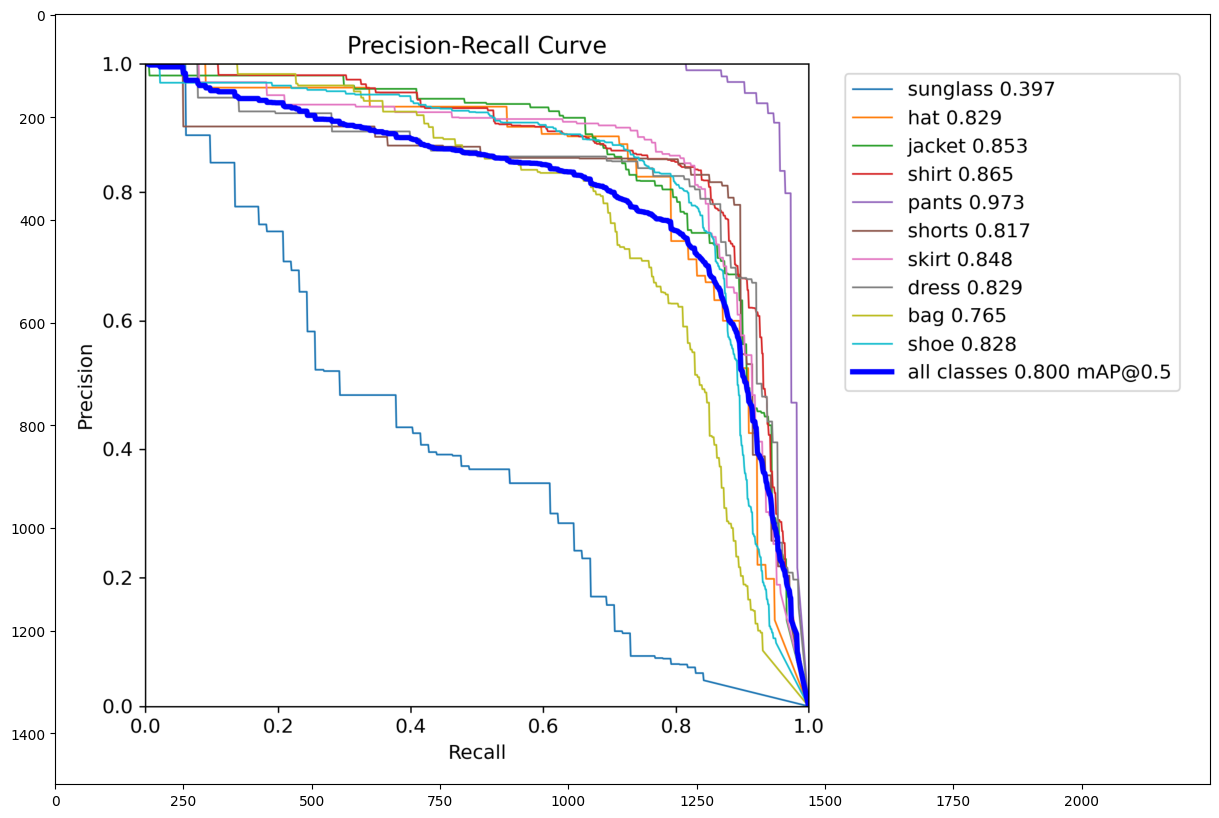

In [ ]:
plot(['PR_curve.png'],(1,1))

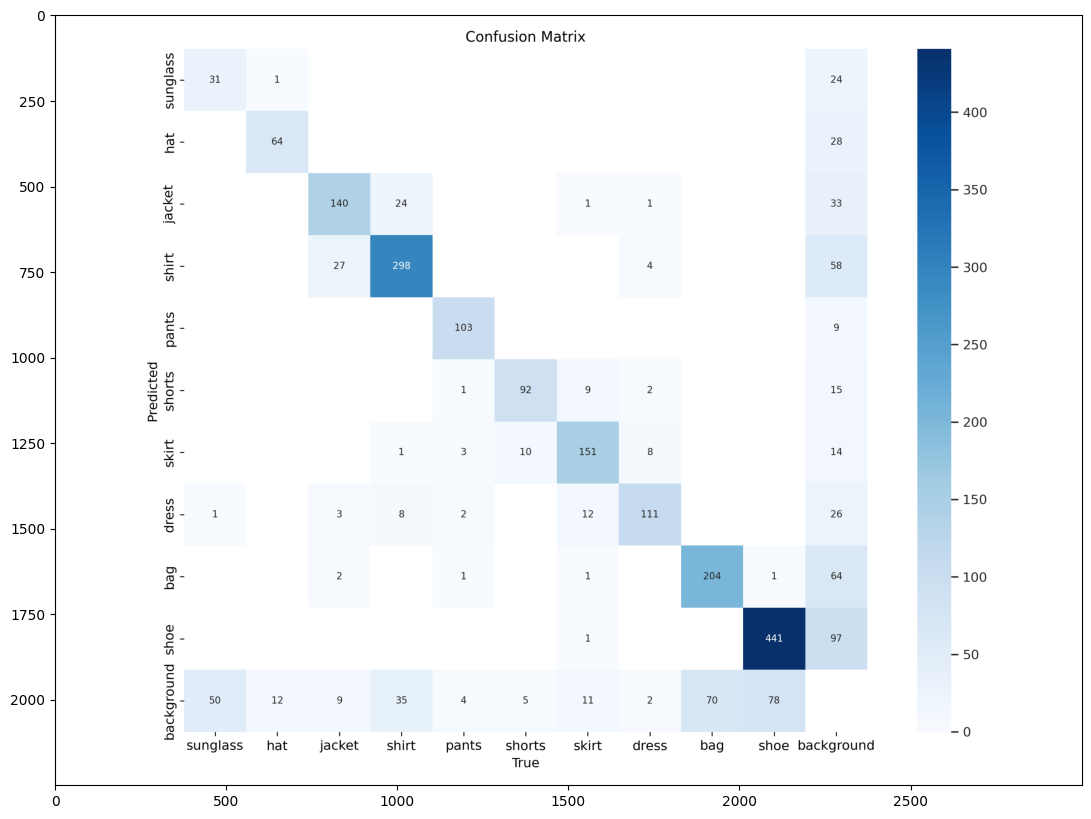

In [ ]:
plot(['confusion_matrix.png'],(1,1))

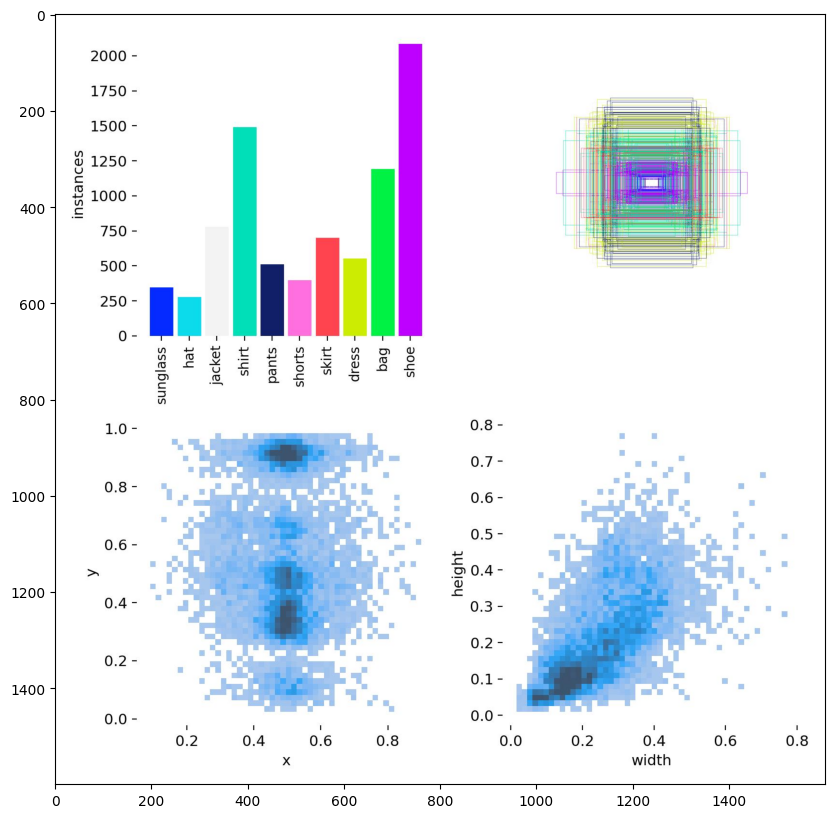

In [ ]:
plot(['labels.jpg'],(1,1))

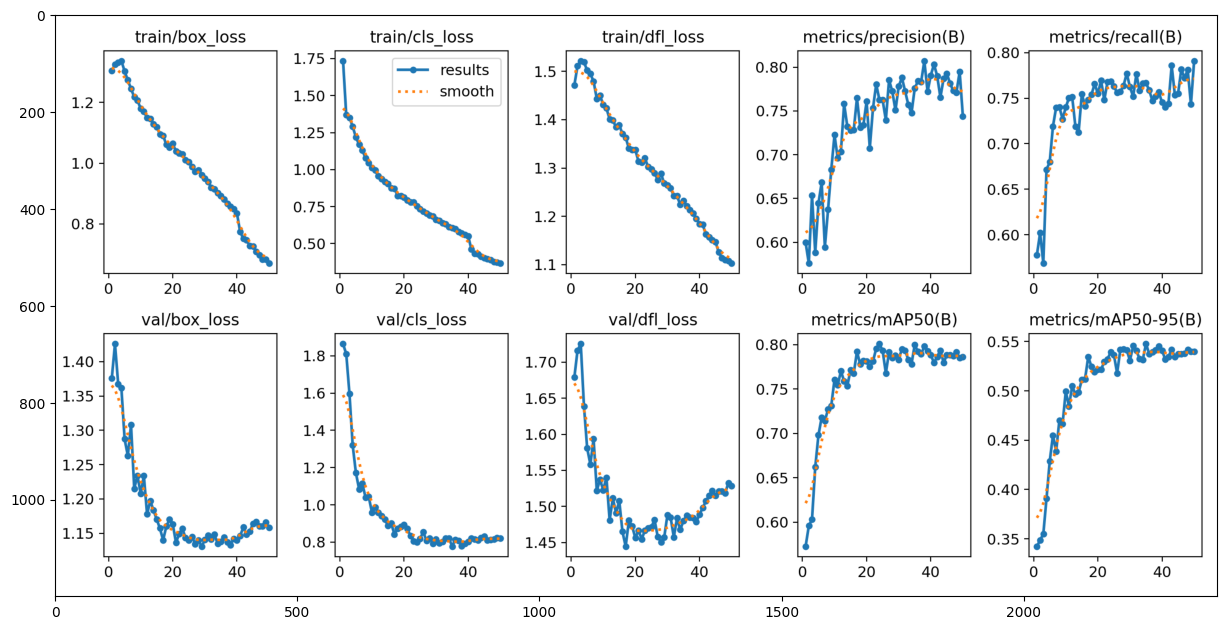

In [ ]:
plot(['results.png'],(1,1))


image 1/1 /content/Fashion-Dataset-Yolov8/JPEGImages/61828.jpg: 640x448 1 jacket, 2 shirts, 1 pants, 1 shoe, 45.8ms
Speed: 3.2ms preprocess, 45.8ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/train34


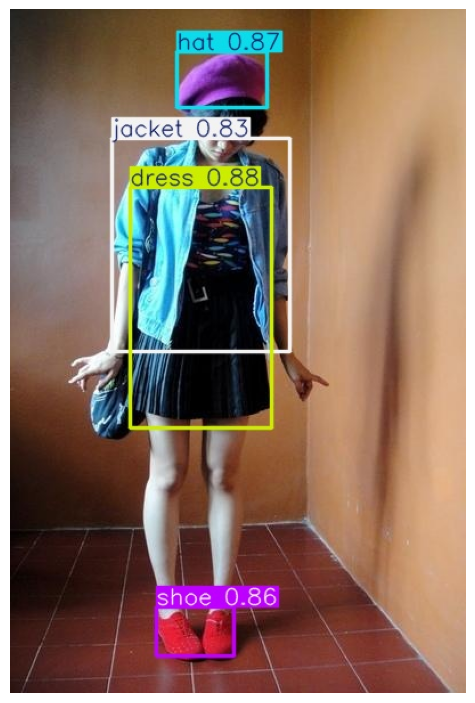

In [ ]:
# choose random image from dataset
plt.figure(figsize=(20,20))
imgs = random.sample(os.listdir(images_path), 1)
c=1
for img in imgs:
    i=model.predict(source=images_path+img, conf=0.4, save=True, line_width=2)

    im = plt.imread('/content/runs/detect/train32/85115.jpg')
    plt.subplot(2,3,c)
    plt.axis('off')
    plt.imshow(im)
    c+=1